In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth2 = pd.read_csv(DATA_DIR + 'ETT-small/ETTh2.csv', index_col=0)

In [4]:
etth2.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


In [5]:
etth2.shape

(17420, 7)

<Axes: xlabel='date'>

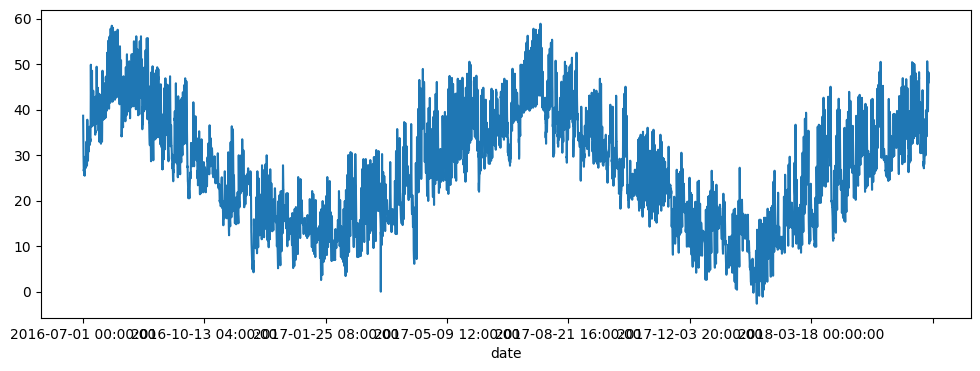

In [6]:
plt.figure(figsize=(12,4))
etth2['OT'].plot()

In [7]:
scaler = MinMaxScaler()
timeseries = etth2['OT']
scaled_etth2 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

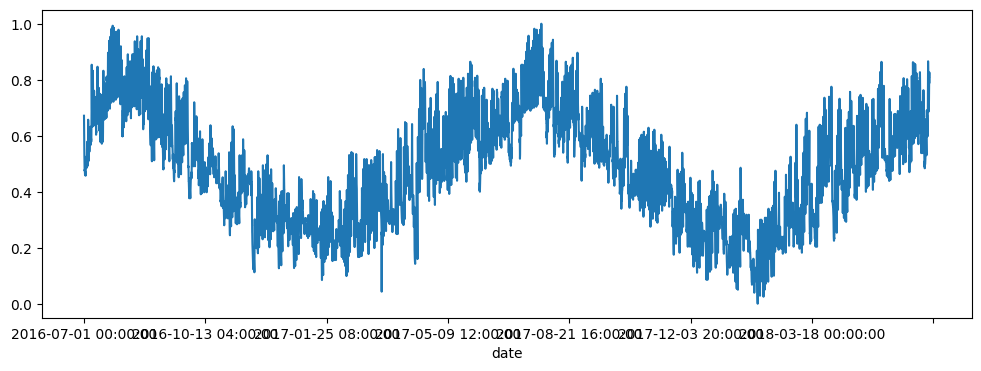

In [8]:
scaled_etth2 = pd.Series(scaled_etth2.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth2.plot()

In [10]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1684407647
Epoch 2, Boundaries delta: 0.0664800840, Codewords delta: 0.0479021651
Epoch 3, Boundaries delta: 0.0437378845, Codewords delta: 0.0361064685
Epoch 4, Boundaries delta: 0.0322838123, Codewords delta: 0.0276673363
Epoch 5, Boundaries delta: 0.0244370563, Codewords delta: 0.0214126354
Epoch 6, Boundaries delta: 0.0186782690, Codewords delta: 0.0168079916
Epoch 7, Boundaries delta: 0.0147258092, Codewords delta: 0.0134371881
Epoch 8, Boundaries delta: 0.0119099812, Codewords delta: 0.0109171463
Epoch 9, Boundaries delta: 0.0099812567, Codewords delta: 0.0093073102
Epoch 10, Boundaries delta: 0.0087880136, Codewords delta: 0.0082457863
Epoch 11, Boundaries delta: 0.0079185668, Codewords delta: 0.0073519897
Epoch 12, Boundaries delta: 0.0071683267, Codewords delta: 0.0065994022
Epoch 13, Boundaries delta: 0.0065245920, Codewords delta: 0.0059623327
Epoch 14, Boundaries delta: 0.0059607025, Codewords delta: 0.0055037666
E

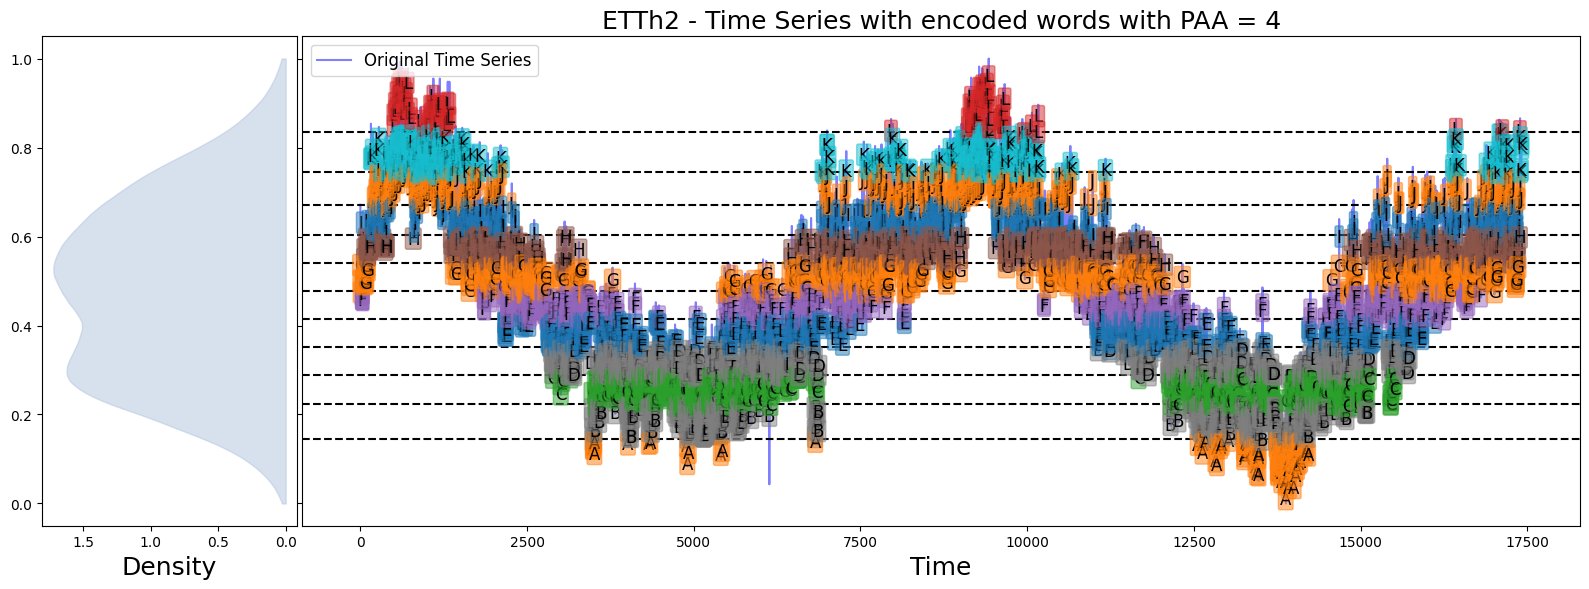

In [10]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth2.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTh2_ksax.png", data_name='ETTh2')
kernel_sax.text_to_df(start_datetime=str(etth2.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTh2_ksax.csv")

### Stationary

In [11]:
target = scaled_etth2
target = target.diff().dropna()

In [12]:
target.head()

date
2016-07-01 01:00:00   -0.024999
2016-07-01 02:00:00   -0.010711
2016-07-01 03:00:00   -0.046429
2016-07-01 04:00:00   -0.028574
2016-07-01 05:00:00   -0.021431
dtype: float64

Epoch 1, Boundaries delta: 0.1360146224, Codewords delta: 0.1520299696
Epoch 2, Boundaries delta: 0.0599348703, Codewords delta: 0.0292229753
Epoch 3, Boundaries delta: 0.0285077777, Codewords delta: 0.0162058287
Epoch 4, Boundaries delta: 0.0160270334, Codewords delta: 0.0113940215
Epoch 5, Boundaries delta: 0.0106706772, Codewords delta: 0.0085793637
Epoch 6, Boundaries delta: 0.0078211915, Codewords delta: 0.0066072349
Epoch 7, Boundaries delta: 0.0059398524, Codewords delta: 0.0051832688
Epoch 8, Boundaries delta: 0.0046840384, Codewords delta: 0.0041293293
Epoch 9, Boundaries delta: 0.0037418539, Codewords delta: 0.0033332223
Epoch 10, Boundaries delta: 0.0030215142, Codewords delta: 0.0027583315
Epoch 11, Boundaries delta: 0.0024730179, Codewords delta: 0.0023441415
Epoch 12, Boundaries delta: 0.0021431610, Codewords delta: 0.0020387857
Epoch 13, Boundaries delta: 0.0019234409, Codewords delta: 0.0018102454
Epoch 14, Boundaries delta: 0.0017365847, Codewords delta: 0.0016182026
E

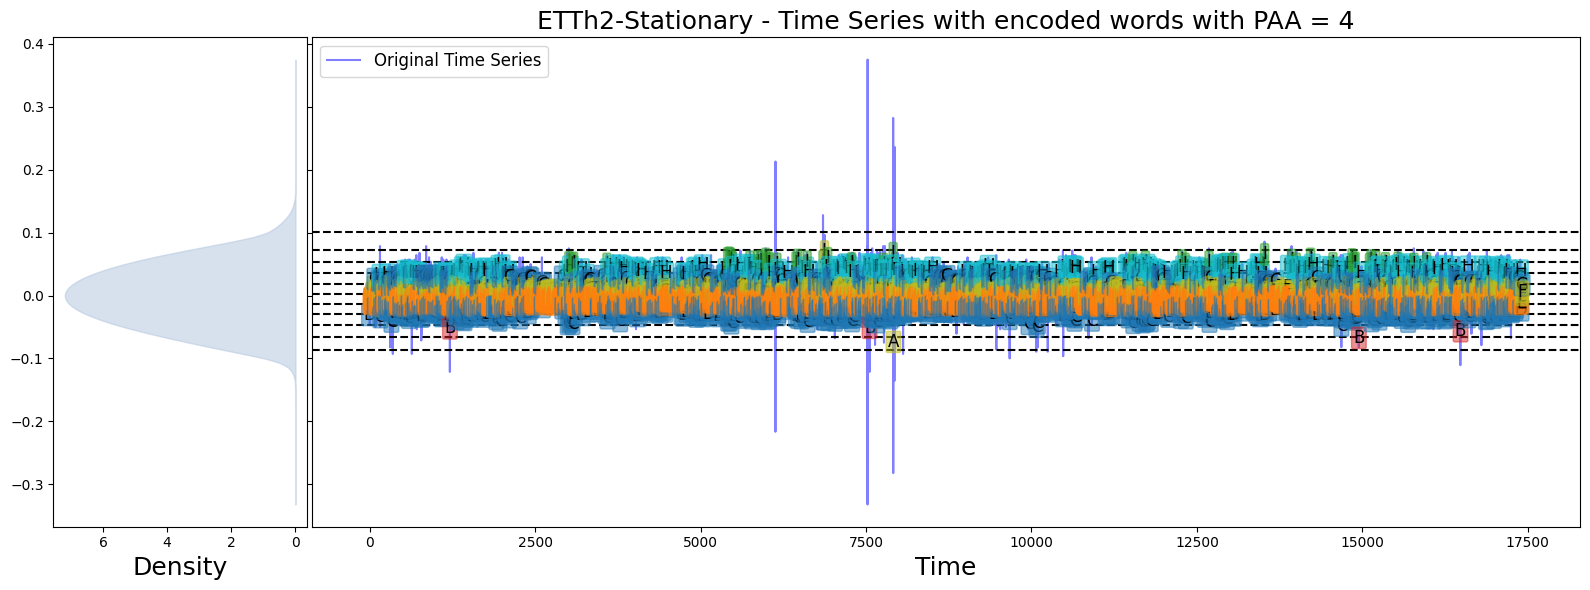

In [13]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTh2_stationary_ksax.png", data_name='ETTh2-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth2.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTh2_stationary_ksax.csv")